# NATIONAL GRID - SSE- FTSE 100

You need to download the daily prices from 02/03/2020 to 28/02/2022, in total 504 days. Then set the first 484 days as the training set and the last 20 days as the test set.

In [1]:
# import required libraries or commands within a library
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [2]:
# Download Stock prices
NG=yf.download('NG.L',start='2020-03-02',end='2022-03-01')
SSE=yf.download('SSE.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
NG,FTSE,SSE

(                   Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2020-03-02   986.900024  1011.200012   979.299988  1006.200012   836.862366   
 2020-03-03  1020.200012  1042.199951  1008.200012  1013.400024   842.850586   
 2020-03-04  1005.599976  1050.000000  1002.599976  1050.000000   873.290955   
 2020-03-05  1052.199951  1054.199951  1035.000000  1054.199951   876.784058   
 2020-03-06  1031.599976  1045.145996  1003.599976  1015.200012   844.347656   
 ...                 ...          ...          ...          ...          ...   
 2022-02-22  1070.000000  1075.000000  1058.199951  1071.800049   988.130981   
 2022-02-23  1074.400024  1082.800049  1064.800049  1080.000000   995.690857   
 2022-02-24  1060.000000  1074.880005  1050.000000  1052.599976   970.429810   
 2022-02-25  1059.400024  1105.199951  1052.599976  1100.599976  1014.682800   
 2022-02-28  1100.000000  1132.000000  1

## Index NATIONAL GRID, SSE, FTSE 100 

In [4]:
#show the index of DataFrame
NG.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [5]:
FTSE.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [6]:
SSE.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [7]:
#check is there any point of NG index different from BEZ index
NG.index.difference(SSE.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
#check is there any point of NG index different from FTSE index
NG.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
#check is there any point of NG index different from FTSE index
SSE.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
#drop the row
NG=NG.drop(['2020-12-22'])
SSE=SSE.drop(['2020-12-22'])

In [11]:
NG.index,FTSE.index,SSE.index

(DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
                '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
                '2020-03-12', '2020-03-13',
                ...
                '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
                '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
                '2022-02-25', '2022-02-28'],
               dtype='datetime64[ns]', name='Date', length=504, freq=None),
 DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
                '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
                '2020-03-12', '2020-03-13',
                ...
                '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
                '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
                '2022-02-25', '2022-02-28'],
               dtype='datetime64[ns]', name='Date', length=504, freq=None),
 DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-0

In [12]:
NG.head(1),SSE.head(1),FTSE.head(1)

(                  Open         High         Low        Close   Adj Close  \
 Date                                                                       
 2020-03-02  986.900024  1011.200012  979.299988  1006.200012  836.862366   
 
               Volume  
 Date                  
 2020-03-02  16054131  ,
               Open    High     Low   Close    Adj Close   Volume
 Date                                                            
 2020-03-02  1581.0  1581.0  1518.5  1545.5  1266.520508  6099413,
                    Open         High     Low        Close    Adj Close  \
 Date                                                                     
 2020-03-02  6580.600098  6775.200195  6496.0  6654.899902  6654.899902   
 
                 Volume  
 Date                    
 2020-03-02  1770844200  )

### Dropping columns

In [13]:
# Drop the columns we don't need
NG=NG.drop(columns=['Open','High','Low','Close','Volume'])
SSE=SSE.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [14]:
NG.head(1),SSE.head(1),FTSE.head(1)

(             Adj Close
 Date                  
 2020-03-02  836.862366,
               Adj Close
 Date                   
 2020-03-02  1266.520508,
               Adj Close
 Date                   
 2020-03-02  6654.899902)

### Training and Test sets

In [15]:
# Training sets
NGtr=NG.iloc[0:484]
SSEtr=SSE.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

In [16]:
# Test set
NGte=NG.iloc[484:504]
SSEte=SSE.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

### Daily Returns

### The formula is: today's return = (today's price - yesterday's price)/yesterday's price

In [17]:
#NationalGrid Daily returns
returns1=(NGtr['Adj Close']-NGtr.shift(1)['Adj Close'])/NGtr.shift(1)['Adj Close']
#SSEon Group Daily returns
returns2=(SSEtr['Adj Close']-SSEtr.shift(1)['Adj Close'])/SSEtr.shift(1)['Adj Close']
#FTSE 100 Daily returns
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [18]:
NGtr['Return']=returns1
SSEtr['Return']=returns2
FTSEtr['Return']=returns3

/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_77322/1303071059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGtr['Return']=returns1
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_77322/1303071059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSEtr['Return']=returns2
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_77322/1303071059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [19]:
returns1,returns2,returns3

(Date
 2020-03-02         NaN
 2020-03-03    0.007156
 2020-03-04    0.036116
 2020-03-05    0.004000
 2020-03-06   -0.036995
                 ...   
 2022-01-25    0.002039
 2022-01-26   -0.006474
 2022-01-27    0.021411
 2022-01-28   -0.004739
 2022-01-31   -0.011355
 Name: Adj Close, Length: 484, dtype: float64,
 Date
 2020-03-02         NaN
 2020-03-03    0.021029
 2020-03-04    0.041191
 2020-03-05   -0.004869
 2020-03-06   -0.036697
                 ...   
 2022-01-25   -0.000325
 2022-01-26    0.002277
 2022-01-27    0.020123
 2022-01-28    0.004454
 2022-01-31    0.002534
 Name: Adj Close, Length: 484, dtype: float64,
 Date
 2020-03-02         NaN
 2020-03-03    0.009512
 2020-03-04    0.014498
 2020-03-05   -0.016169
 2020-03-06   -0.036210
                 ...   
 2022-01-25    0.010182
 2022-01-26    0.013335
 2022-01-27    0.011312
 2022-01-28   -0.011675
 2022-01-31   -0.000228
 Name: Adj Close, Length: 484, dtype: float64)

In [20]:
NGte['Return']=(NGte['Adj Close']-NGte.shift(1)['Adj Close'])/NGte.shift(1)['Adj Close']
NGte.iloc[0,1]=(NGte.iloc[0,0]-NGtr.iloc[-1,0])/NGtr.iloc[-1,0]
SSEte['Return']=(SSEte['Adj Close']-SSEte.shift(1)['Adj Close'])/SSEte.shift(1)['Adj Close']
SSEte.iloc[0,1]=(SSEte.iloc[0,0]-SSEtr.iloc[-1,0])/SSEtr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_77322/1842186877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGte['Return']=(NGte['Adj Close']-NGte.shift(1)['Adj Close'])/NGte.shift(1)['Adj Close']
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/vq/_m6js4b9619dhfpkv2cqslym0000gn/T/ipykernel_77322/1842186877.py:3: SettingWithCopyWarning: 
A 

## Descriptive Analytics

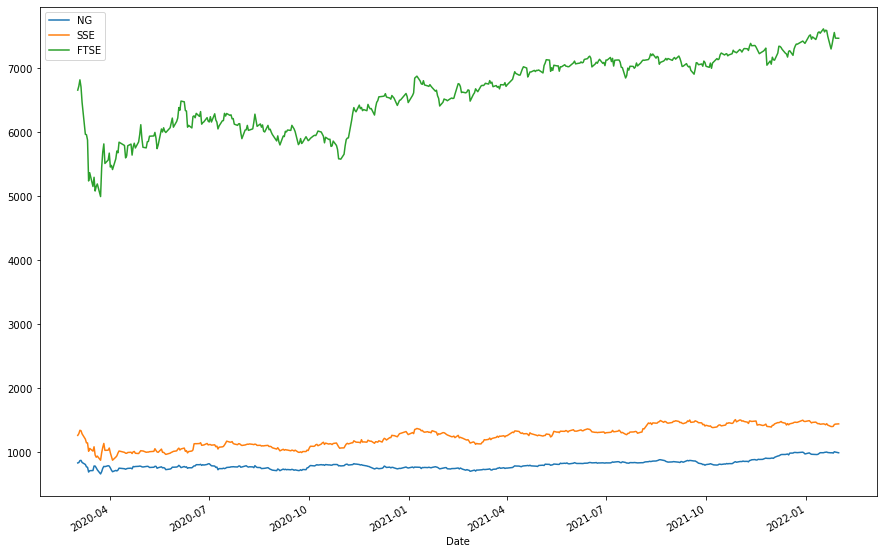

In [21]:
NGtr['Adj Close'].plot(figsize=(15,10), label='NG')
SSEtr['Adj Close'].plot(label='SSE')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

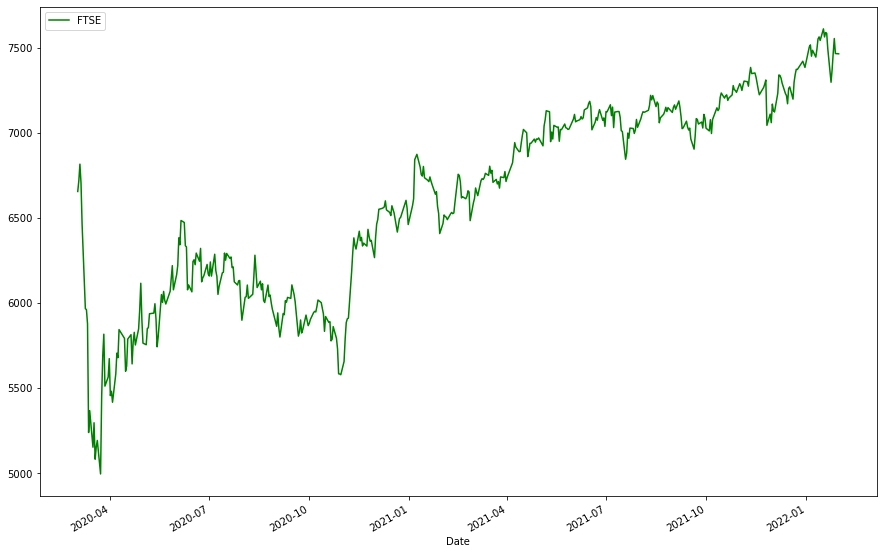

In [22]:
FTSEtr['Adj Close'].plot( figsize=(15,10), label='FTSE', color='g')
plt.legend()
plt.show()

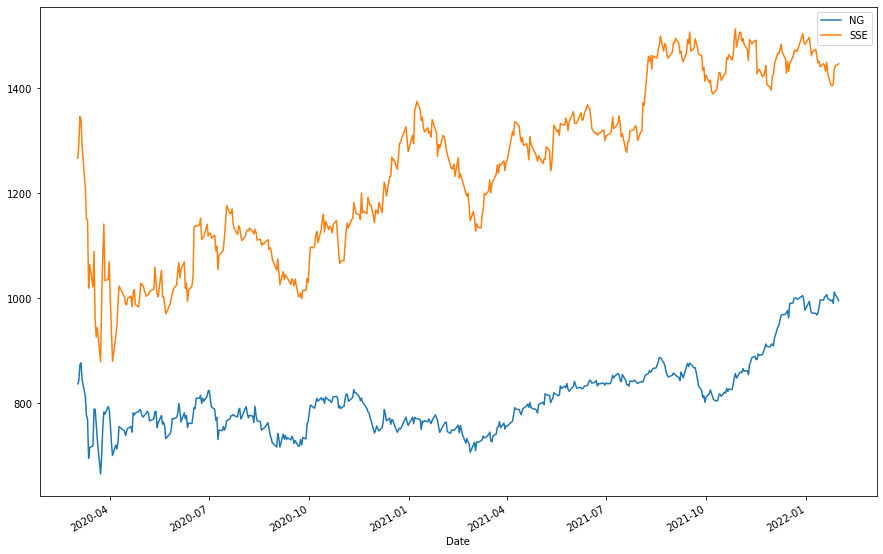

In [23]:
NGtr['Adj Close'].plot(figsize=(15,10), label='NG')
SSEtr['Adj Close'].plot(label='SSE')
plt.legend()
plt.show()

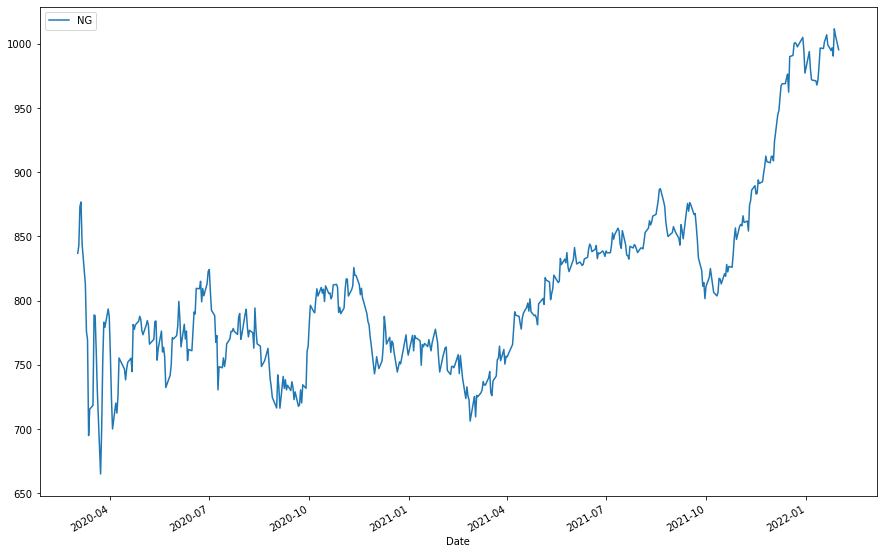

In [24]:
NGtr['Adj Close'].plot(figsize=(15,10), label='NG')
plt.legend()
plt.show()

In [25]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10

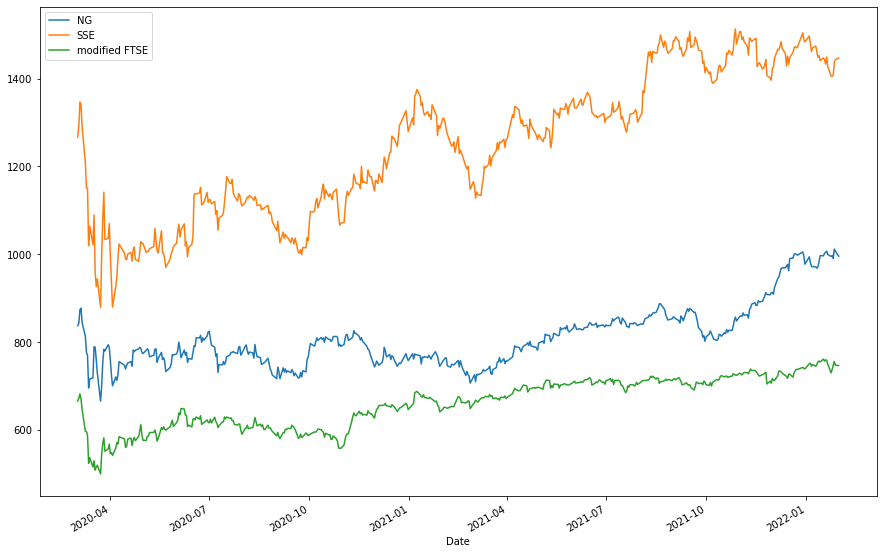

In [26]:
NGtr['Adj Close'].plot(figsize=(15,10), label='NG')
SSEtr['Adj Close'].plot(label='SSE')
mFTSEtr['m Adj Close'].plot(label='modified FTSE')
plt.legend()
plt.show()

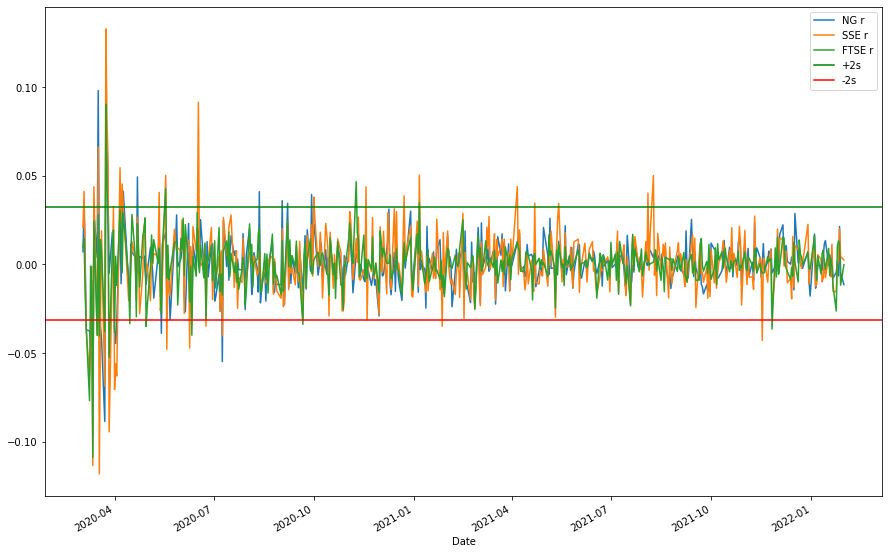

In [27]:
NGtr['Return'].plot(figsize=(15,10), label='NG r')
SSEtr['Return'].plot(label='SSE r')
FTSEtr['Return'].plot(label='FTSE r')
plt.axhline(y=NGtr['Return'].mean()+2*NGtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=NGtr['Return'].mean()-2*NGtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

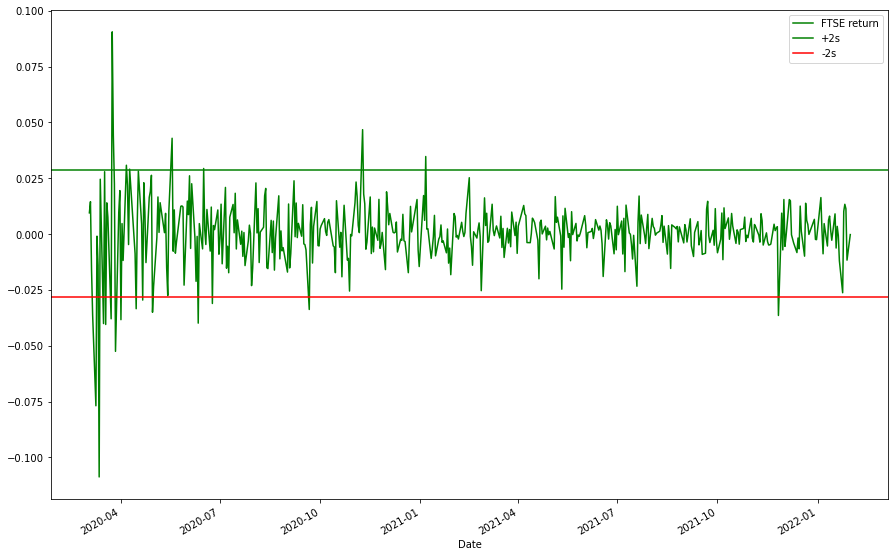

In [28]:
FTSEtr['Return'].plot(label='FTSE return',color='g',figsize=(15,10))
plt.axhline(y=FTSEtr['Return'].mean()+2*FTSEtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=FTSEtr['Return'].mean()-2*FTSEtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

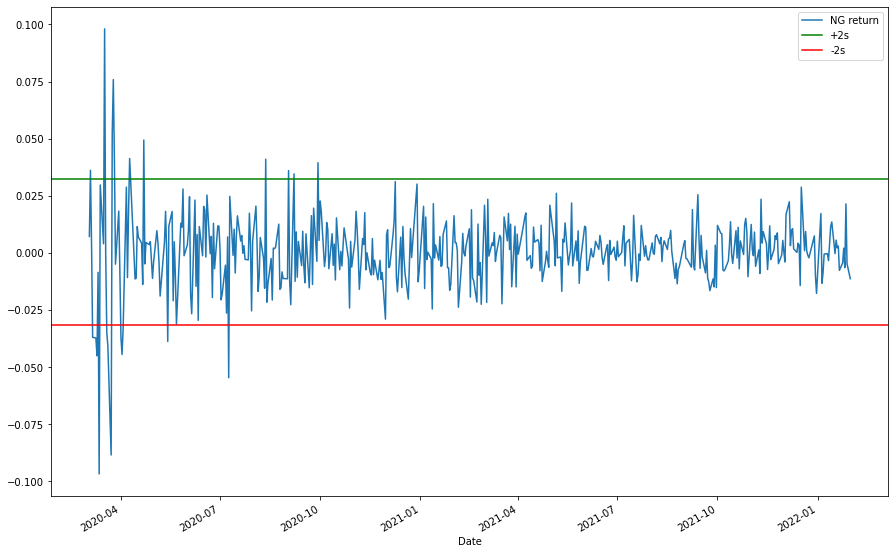

In [29]:
NGtr['Return'].plot(label='NG return',figsize=(15,10))
plt.axhline(y=NGtr['Return'].mean()+2*NGtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=NGtr['Return'].mean()-2*NGtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

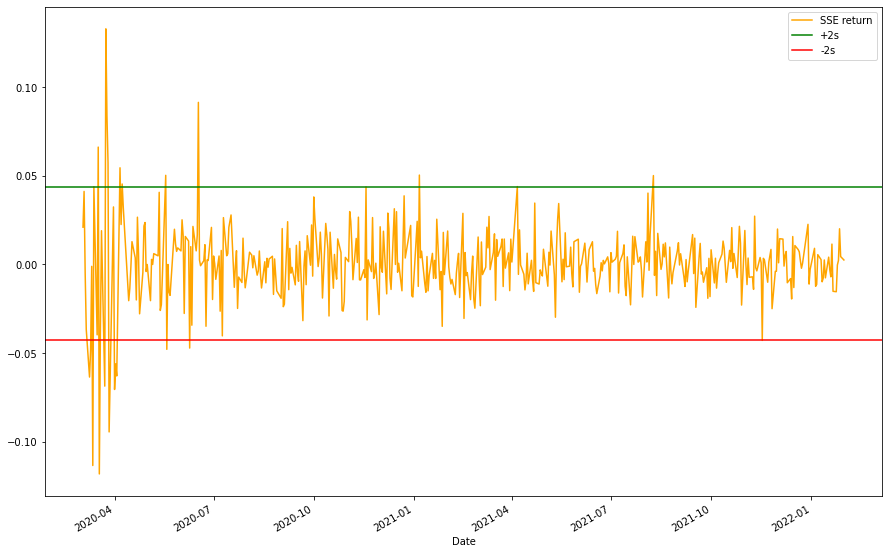

In [30]:
SSEtr['Return'].plot(label='SSE return', color='orange', figsize=(15,10))
plt.axhline(y=SSEtr['Return'].mean()+2*SSEtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=SSEtr['Return'].mean()-2*SSEtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

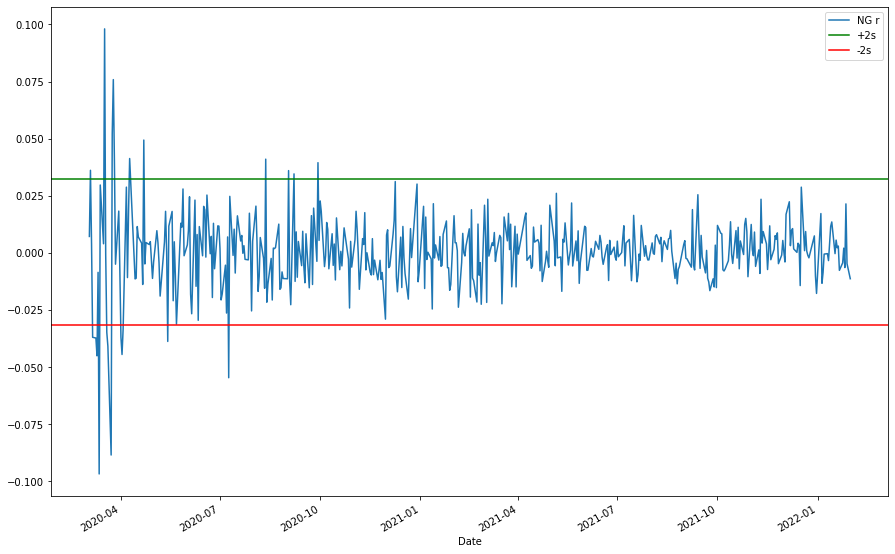

In [31]:
#Empirical Rules, Page 75 of Lecture 1
NGtr['Return'].plot(figsize=(15,10), label='NG r')
plt.axhline(y=NGtr['Return'].mean()+2*NGtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=NGtr['Return'].mean()-2*NGtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [32]:
#select rows by value 
pss=NGtr['Return'].mean()+2*NGtr['Return'].std()
NGtr.loc[NGtr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-04,873.290955,0.036116
2020-03-17,788.872925,0.098055
2020-03-24,699.714050,0.052020
2020-03-25,752.776794,0.075835
2020-03-26,783.217285,0.040438
2020-04-09,755.355164,0.041275
2020-04-22,781.470642,0.049363
2020-08-12,794.311279,0.041000
2020-09-02,742.228088,0.035988


In [33]:
nss=NGtr['Return'].mean()-2*NGtr['Return'].std()
NGtr.loc[NGtr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-06,844.347656,-0.036995
2020-03-09,812.826050,-0.037332
2020-03-10,776.147827,-0.045124
2020-03-12,694.973267,-0.096844
2020-03-19,760.844360,-0.034817
2020-03-20,729.738586,-0.040883
2020-03-23,665.115051,-0.088557
2020-04-01,758.182922,-0.036974
2020-04-02,724.415710,-0.044537


In [34]:
NGtr.loc[NGtr['Return']==NGtr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-12,694.973267,-0.096844


### Statistics

In [35]:
NGtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,809.756522,0.000487
std,68.746902,0.016007
min,665.115051,-0.096844
25%,761.739365,-0.007006
50%,794.568787,0.000397
75%,841.102402,0.008113
max,1011.548096,0.098055


In [36]:
SSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,1246.991462,0.000506
std,161.401812,0.021456
min,878.902222,-0.118134
25%,1118.211304,-0.009395
50%,1263.828064,0.000657
75%,1390.383575,0.009921
max,1513.061157,0.132867


In [37]:
FTSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [38]:
# Return to risk
NGtr['Return'].mean()/NGtr['Return'].std()

0.030441221272173313

In [39]:
# Return to risk
SSEtr['Return'].mean()/SSEtr['Return'].std()

0.023571407797753727

In [40]:
# Return to risk
FTSEtr['Return'].mean()/FTSEtr['Return'].std()

0.02384533700911166

### Boxplot

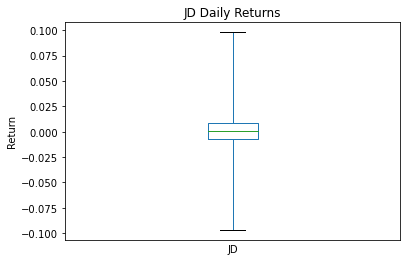

In [41]:
NGb=NGtr.boxplot(column='Return',whis=[0,100],grid=False)

NGb.set_title("JD Daily Returns",fontsize=12)
NGb.set_xlabel('JD', fontsize=10)
NGb.set_ylabel('Return', fontsize=10)
NGb.set_xticks([])
plt.show()

In [42]:
#Creturns=pd.concat([HSXtr['Return'],BEZtr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['HSX','BEZ','FTSE']

In [43]:
AllTrainingReturns=pd.DataFrame({'NG r':NGtr['Return'],'SSE r':SSEtr['Return'],'FTSE r':FTSEtr['Return']})

In [44]:
print (AllTrainingReturns)

                NG r     SSE r    FTSE r
Date                                    
2020-03-02       NaN       NaN       NaN
2020-03-03  0.007156  0.021029  0.009512
2020-03-04  0.036116  0.041191  0.014498
2020-03-05  0.004000 -0.004869 -0.016169
2020-03-06 -0.036995 -0.036697 -0.036210
...              ...       ...       ...
2022-01-25  0.002039 -0.000325  0.010182
2022-01-26 -0.006474  0.002277  0.013335
2022-01-27  0.021411  0.020123  0.011312
2022-01-28 -0.004739  0.004454 -0.011675
2022-01-31 -0.011355  0.002534 -0.000228

[484 rows x 3 columns]


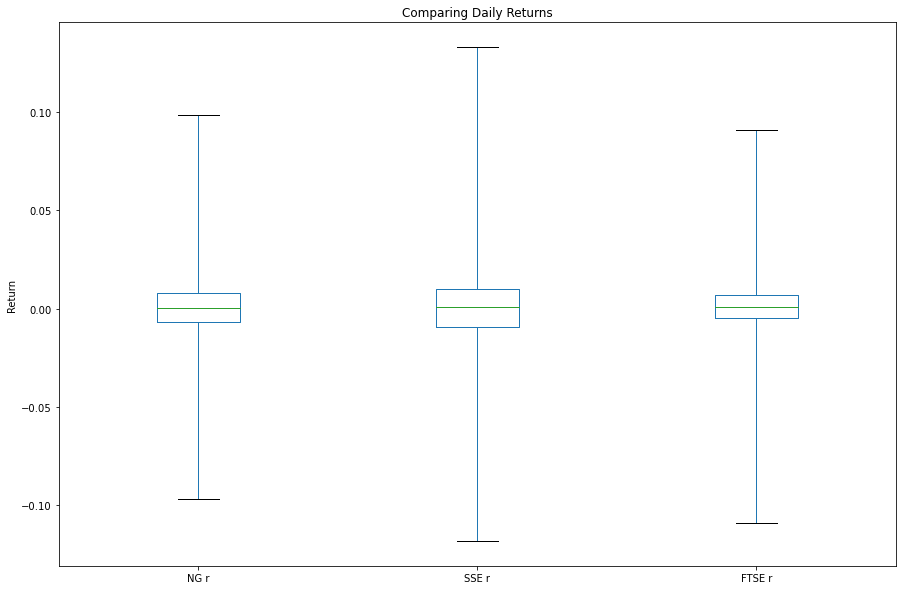

In [45]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False,figsize=(15,10) )
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

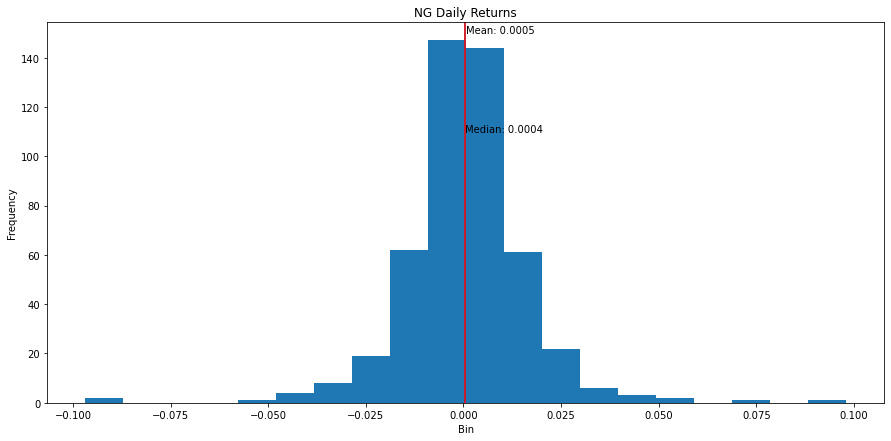

In [46]:
NGtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("NG Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(NGtr['Return'].mean())
plt.text(NGtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(NGtr['Return'].mean()))

plt.axvline(NGtr['Return'].median(),color='r')
plt.text(NGtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(NGtr['Return'].median()))

plt.show()

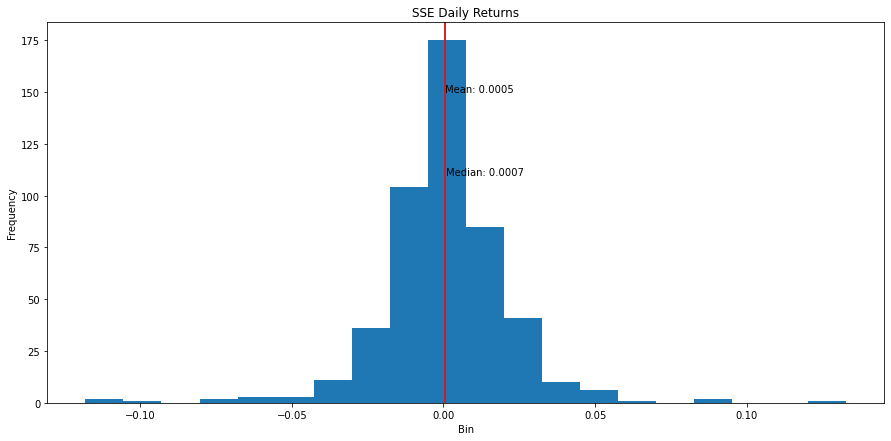

In [47]:
SSEtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("SSE Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(SSEtr['Return'].mean())
plt.text(SSEtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(SSEtr['Return'].mean()))

plt.axvline(SSEtr['Return'].median(),color='r')
plt.text(SSEtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(SSEtr['Return'].median()))

plt.show()

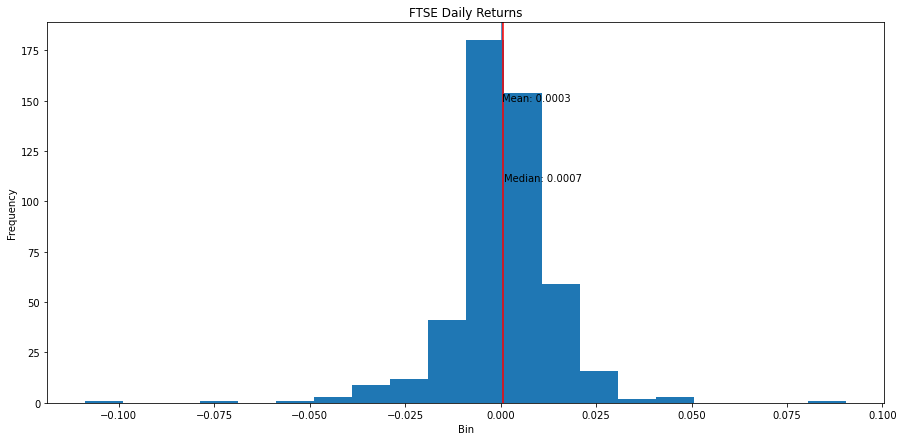

In [48]:
FTSEtr.hist(column='Return',bins=20,grid=False, figsize=(15,7))

plt.title("FTSE Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(FTSEtr['Return'].mean())
plt.text(FTSEtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(FTSEtr['Return'].mean()))

plt.axvline(FTSEtr['Return'].median(),color='r')
plt.text(FTSEtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(FTSEtr['Return'].median()))

plt.show()

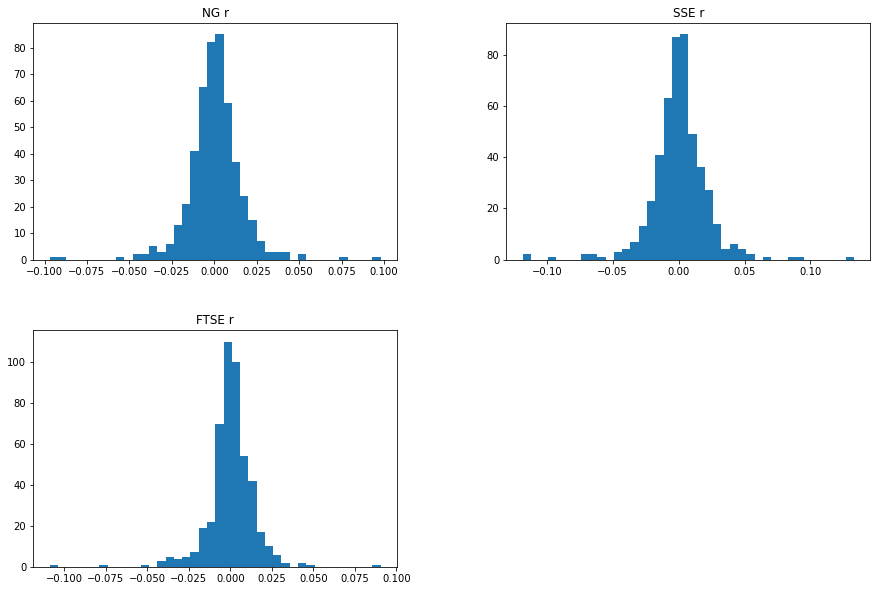

In [49]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,figsize=(15,10),grid=False)

plt.show()

## Regression

In [50]:
# The three dataframes have the same column names, we should change the names and merge them together
NGtr.columns=['NG_Price','NG_Return']
SSEtr.columns=['SSE_Price','SSE_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([NGtr,SSEtr,FTSEtr],axis=1)

In [51]:
OverallTraining.head()

,NG_Price,NG_Return,SSE_Price,SSE_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,836.862366,NaN,1266.520508,NaN,6654.899902,NaN
2020-03-03,842.850586,0.007156,1293.154053,0.021029,6718.200195,0.009512
2020-03-04,873.290955,0.036116,1346.420776,0.041191,6815.600098,0.014498
2020-03-05,876.784058,0.004000,1339.864746,-0.004869,6705.399902,-0.016169
2020-03-06,844.347656,-0.036995,1290.695557,-0.036697,6462.600098,-0.036210


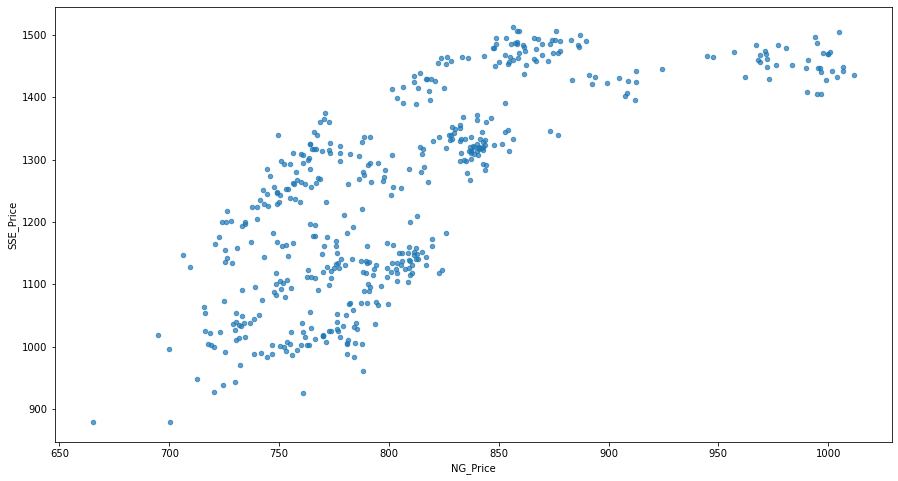

In [52]:
OverallTraining.plot.scatter(x='NG_Price',y='SSE_Price',alpha=0.7,figsize=(15,8))
plt.show()

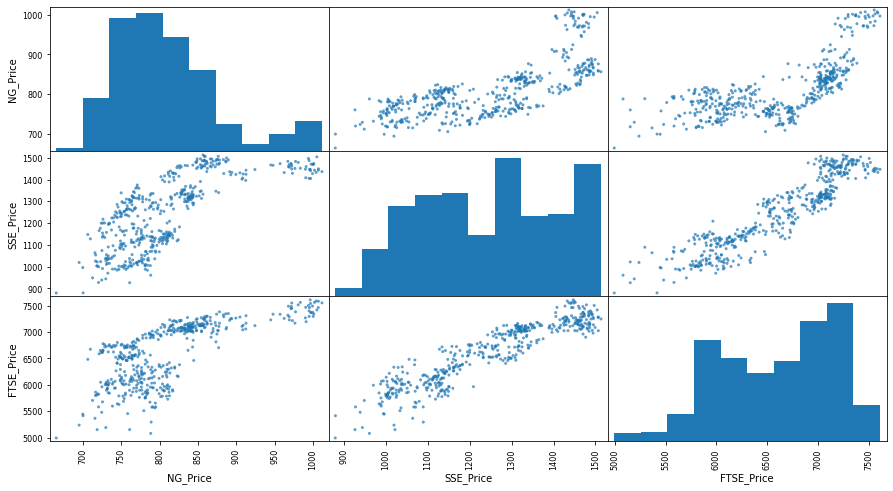

In [53]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7,figsize=(15,8))
plt.show()

In [54]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,NG_Price,SSE_Price,FTSE_Price
NG_Price,1.000000,0.732335,0.703918
SSE_Price,0.732335,1.000000,0.923621
FTSE_Price,0.703918,0.923621,1.000000


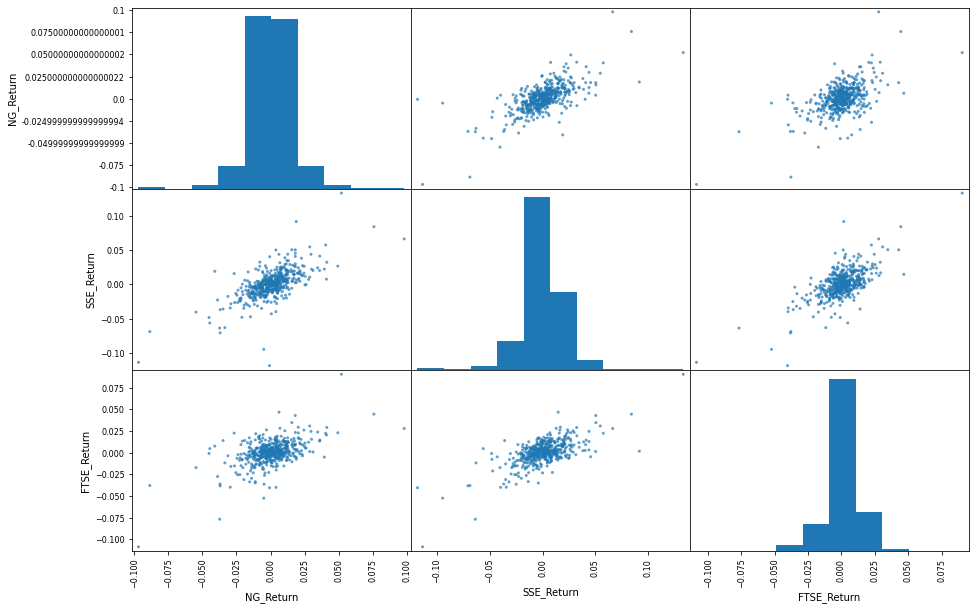

In [55]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7,figsize=(15,10))
plt.show()

In [56]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,NG_Return,SSE_Return,FTSE_Return
NG_Return,1.000000,0.680737,0.553363
SSE_Return,0.680737,1.000000,0.688786
FTSE_Return,0.553363,0.688786,1.000000


In [57]:
NG_SSE_reg=sfa.ols('NG_Price ~ SSE_Price', data=OverallTraining).fit()

In [58]:
NG_SSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NG_Price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     557.5
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.80e-82
Time:                        23:04:15   Log-Likelihood:                -2547.8
No. Observations:                 484   AIC:                             5100.
Df Residuals:                     482   BIC:                             5108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.7846     16.611     25.332      0.000     388.146     453.424
SSE_Price      0.3119      0.013     23.611      0.000       0.286       0.338
==============================================================================
Omnibus:                       43.812   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.840
Skew:                           0.751   Prob(JB):                     2.04e-12
Kurtosis:                       3.645   Cond. No.                     9.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
NG_FTSE_reg=sfa.ols('NG_Price ~ FTSE_Price', data=OverallTraining).fit()

In [60]:
NG_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NG_Price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     473.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.26e-73
Time:                        23:04:15   Log-Likelihood:                -2568.2
No. Observations:                 484   AIC:                             5140.
Df Residuals:                     482   BIC:                             5149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.1902     25.768      9.748      0.000     200.559     301.822
FTSE_Price     0.0846      0.004     21.758      0.000       0.077       0.092
==============================================================================
Omnibus:                       26.490   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.494
Skew:                           0.600   Prob(JB):                     3.94e-07
Kurtosis:                       3.153   Cond. No.                     7.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

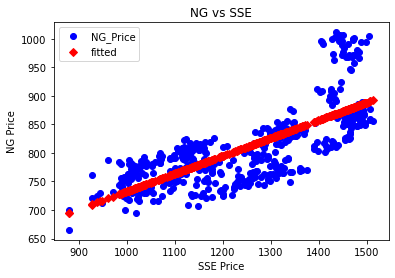

In [61]:
sa.graphics.plot_fit(NG_SSE_reg,exog_idx='SSE_Price',vlines=False)
plt.ylabel("NG Price")
plt.xlabel("SSE Price")
plt.title("NG vs SSE")
plt.show()

## RETURN + FTSE

In [63]:
NG_FTSE_rreg=sfa.ols('NG_Return ~ FTSE_Return', data=OverallTraining).fit()

In [64]:
NG_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NG_Return   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.27e-40
Time:                        23:05:29   Log-Likelihood:                 1400.5
No. Observations:                 483   AIC:                            -2797.
Df Residuals:                     481   BIC:                            -2789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0003      0.001      0.454      0.650      -0.001       0.001
FTSE_Return     0.6205      0.043     14.570      0.000       0.537       0.704
==============================================================================
Omnibus:                       57.302   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.614
Skew:                          -0.012   Prob(JB):                     1.89e-94
Kurtosis:                       7.631   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MULTIPLE REGRESSION

In [65]:
# Multiple Regression
NG_SSE_FTSE_reg=sfa.ols('NG_Price ~ SSE_Price + FTSE_Price', data=OverallTraining).fit()

In [66]:
NG_SSE_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NG_Price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     284.0
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.62e-82
Time:                        23:05:46   Log-Likelihood:                -2545.1
No. Observations:                 484   AIC:                             5096.
Df Residuals:                     481   BIC:                             5109.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    364.0462     29.477     12.350      0.000     306.127     421.965
SSE_Price      0.2382      0.034      6.944      0.000       0.171       0.306
FTSE_Price     0.0225      0.010      2.325      0.020       0.003       0.042
==============================================================================
Omnibus:                       36.499   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.643
Skew:                           0.696   Prob(JB):                     5.50e-10
Kurtosis:                       3.418   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time Series

In [67]:
NGte.columns=['NG_Price','NG_Return']
SSEte.columns=['SSE_Price','SSE_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [68]:
ma5=NGtr.rolling(5).mean()

In [69]:
ma20=NGtr.rolling(20).mean()

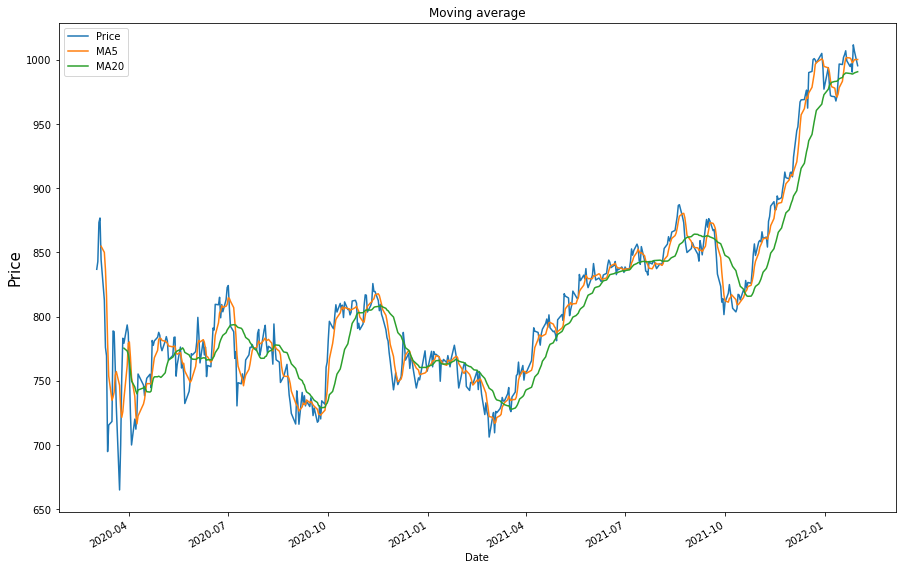

In [70]:
NGtr['NG_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['NG_Price'].plot(label='MA5')
ma20['NG_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [71]:
#creat forecasts
NGma5fcsts=pd.Series([ma5['NG_Price'][-1]]*20)
NGma5fcsts.index=NGte.index

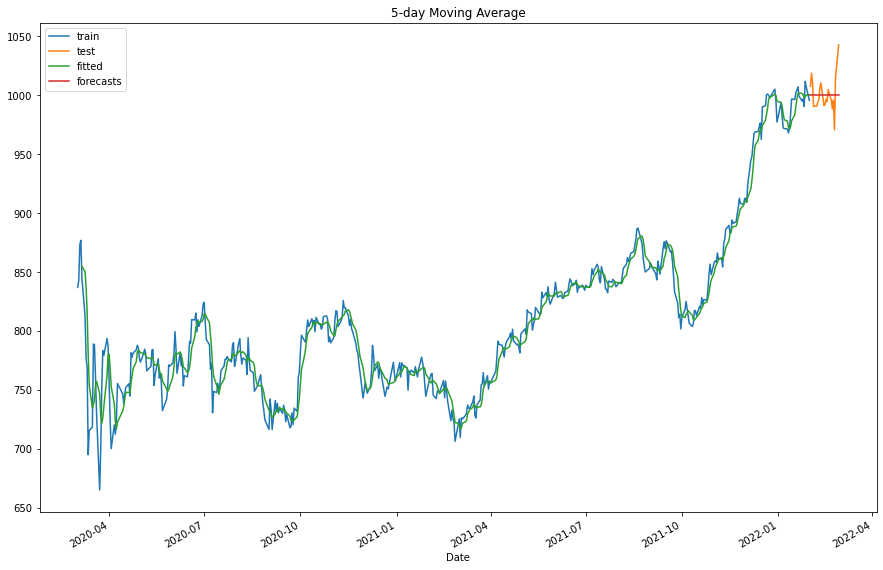

In [72]:
NGtr['NG_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
NGte['NG_Price'].plot(label='test')
ma5['NG_Price'].plot(label='fitted')
NGma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [73]:
MAE(NGte['NG_Price'],NGma5fcsts)

11.089042968750004

In [74]:
MSE(NGte['NG_Price'],NGma5fcsts)

209.46688081666827

In [75]:
print(
    'MAE: {:,.4f}'.format(MAE(NGte['NG_Price'],NGma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(NGte['NG_Price'],NGma5fcsts))
                         )

MAE: 11.0890 
MSE: 209.4669


### Single Exponential Smoothing

In [76]:
NGses=SES(NGtr['NG_Price'],initialization_method="estimated").fit()

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [77]:
NGsesfcsts=NGses.forecast(20)
NGsesfcsts.index=NGte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


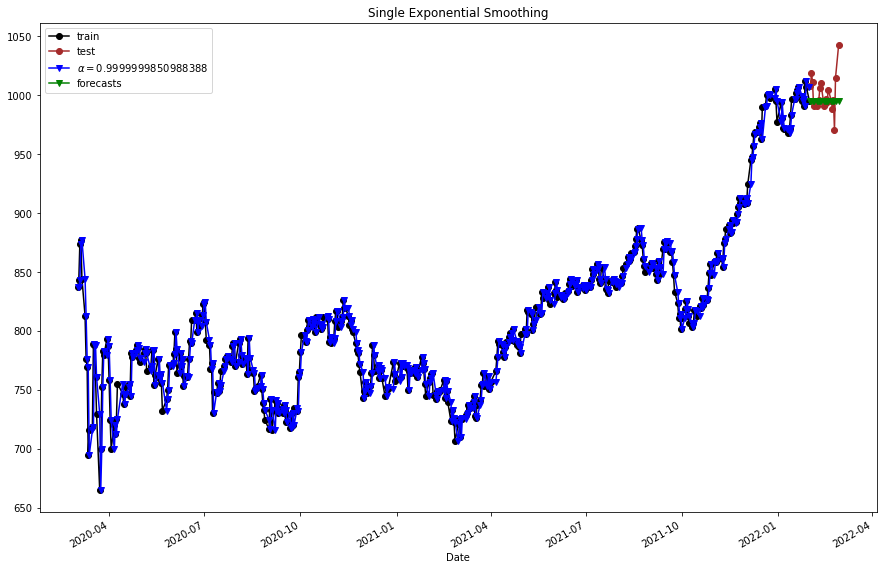

In [78]:
NGtr['NG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
NGte['NG_Price'].plot(marker='o',color='brown',label='test')
NGses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%NGses.model.params['smoothing_level'])
NGsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [79]:
print(
    'MAE: {:,.4f}'.format(MAE(NGte['NG_Price'],NGsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(NGte['NG_Price'],NGsesfcsts))
)

MAE: 10.3073 
MSE: 235.6560


### Double Exponential Smoothing

In [80]:
NGdes=DES(NGtr['NG_Price'],initialization_method="estimated").fit()

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [81]:
NGdesfcsts=NGdes.forecast(20)
NGdesfcsts.index=NGte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


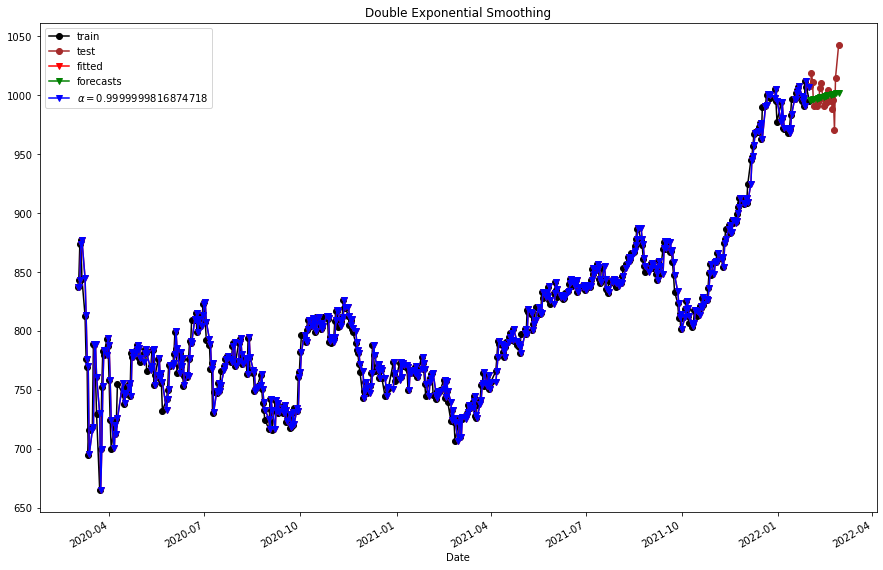

In [82]:
NGtr['NG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
NGte['NG_Price'].plot(marker='o',color='brown',label='test')
NGdes.fittedvalues.plot(marker='v', color='r',label='fitted')
NGdesfcsts.plot(marker='v', color='green',label='forecasts')
NGdes.fittedvalues.plot(marker='v', color='b',label=r'$\alpha=%s$'%NGdes.model.params['smoothing_level'])
plt.legend()
plt.show()

In [83]:
print(
    'MAE: {:,.4f}'.format(MAE(NGte['NG_Price'],NGdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(NGte['NG_Price'],NGdesfcsts))
)

MAE: 11.0742 
MSE: 215.6886


### Holt's Winters (Additive)

In [84]:
NGtesa=TES(NGtr['NG_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
NGtesfcstsa=NGtesa.forecast(20)
NGtesfcstsa.index=NGte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


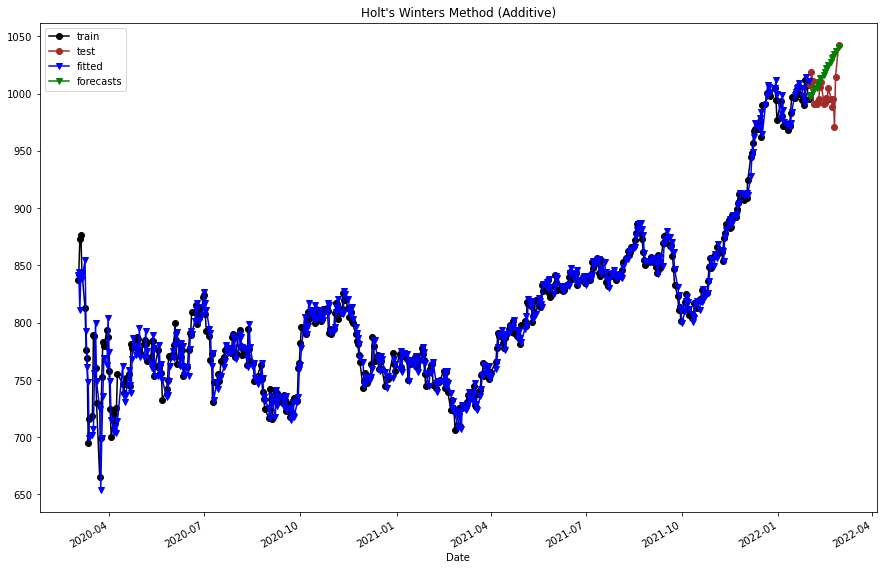

In [85]:
NGtr['NG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
NGte['NG_Price'].plot(marker='o',color='brown',label='test')
NGtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
NGtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [86]:
print(
    'MAE: {:,.4f}'.format(MAE(NGte['NG_Price'],NGtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(NGte['NG_Price'],NGtesfcstsa))
)

MAE: 21.6375 
MSE: 675.3431


### Holt's Winters (Multiplicative)

In [87]:
NGtesm=TES(NGtr['NG_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
NGtesfcstsm=NGtesm.forecast(20)
NGtesfcstsm.index=NGte.index

/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adeolaolorunfemi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


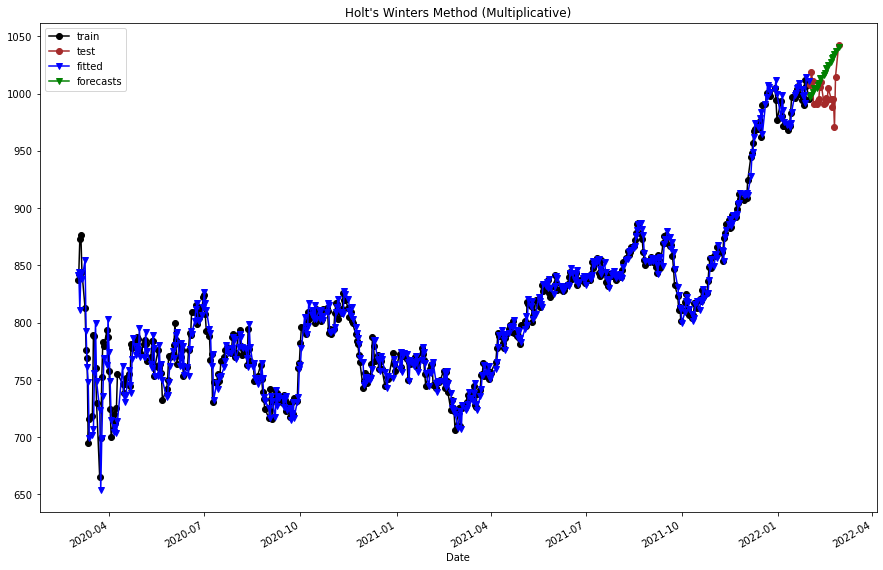

In [88]:
NGtr['NG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
NGte['NG_Price'].plot(marker='o',color='brown',label='test')
NGtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
NGtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [89]:
print(
    'MAE: {:,.4f}'.format(MAE(NGte['NG_Price'],NGtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(NGte['NG_Price'],NGtesfcstsm))
)

MAE: 21.5866 
MSE: 671.4786
